In [32]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
# Twitter App access keys for @user

# Consume:
CONSUMER_KEY    = 'vjw86vvE6Rm3cQihPucTRkN1l'
CONSUMER_SECRET = '6NDHa2zLD6g4R0vqEfF65B5jdHxB83zhYV7qDVm2rH9WlKyusZ'

# Access:
ACCESS_TOKEN  = '996110379896864769-05PXtePousw0UQ6AC3QNP1ZVn2YSORD'
ACCESS_SECRET = 'EEQxnqOyiFh1PFBjXUiB1jFwYXy74k7hMg0khw1LW3qOU'

In [34]:
# We import our access keys:
   # This will allow us to use the keys as variables

# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [35]:
# We create an extractor object:
extractor = twitter_setup()
tweets=[]
# We create a tweet list as follows:

for tweet in tweepy.Cursor(extractor.search,q="@ideacellular",count=100,
                           lang="en",
                           since="2017-04-03").items():
    tweets.append(tweet.text)

print("Number of tweets extracted: {}.\n".format(len(tweet.text)))



Number of tweets extracted: 129.



In [36]:
str1 = ''.join(tweets)


In [37]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

,Tweets
0,@ideacellular On your site and amazon pay it p...
1,@ideacellular this is your network speeds moro...
2,RT @sonymusicindia: Let your callers groove to...
3,@sonymusicindia @AkasaSing @airtelindia @Vodaf...
4,RT @vehla75: .@ideacellular is worst network ...
5,@ManoharaS10 @Airtel_Presence @airtelindia @Ai...
6,@NileshVasava80 @JioCare This telecom war has ...
7,@Airtel_Presence @airtelindia is there any upd...
8,Successfully swapped my sim from #airtel to #i...
9,@idea_cares Hahaha ... See your network range ...


In [38]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [39]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(30))

,Tweets,SA
0,@ideacellular On your site and amazon pay it p...,1
1,@ideacellular this is your network speeds moro...,-1
2,RT @sonymusicindia: Let your callers groove to...,0
3,@sonymusicindia @AkasaSing @airtelindia @Vodaf...,1
4,RT @vehla75: .@ideacellular is worst network ...,-1
5,@ManoharaS10 @Airtel_Presence @airtelindia @Ai...,1
6,@NileshVasava80 @JioCare This telecom war has ...,-1
7,@Airtel_Presence @airtelindia is there any upd...,0
8,Successfully swapped my sim from #airtel to #i...,1
9,@idea_cares Hahaha ... See your network range ...,1


In [40]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [41]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 25.0%
Percentage of neutral tweets: 45.888888888888886%
Percentage de negative tweets: 29.11111111111111%


In [42]:
###Preprocess tweets
def processTweet2(str1):
    # process the tweets

    #Convert to lower case
    str1 = str1.lower()
    #Convert www.* or https?://* to URL
    str1 = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',str1)
  
    #Convert @username to AT_USER
    str1 = re.sub('@[^\s]+...','',str1)
  
    #Remove additional white spaces
    str1 = re.sub('[\s]+', ' ', str1)
    #Replace #word with word
    str1 = re.sub(r'#([^\s]+)', r'\1', str1)
    #trim
    str1 = str1.strip('\'"')
    return str1    


#end

In [43]:
str2= processTweet2(str1)


In [44]:
blob= TextBlob(str2)
str3=[]
count=0
for np in blob.noun_phrases:
  
  str3.append(np)
  count+=1
str4=''.join(str3)

print (count)

2930


In [45]:
# modules for generating the word cloud
from os import path, getcwd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS

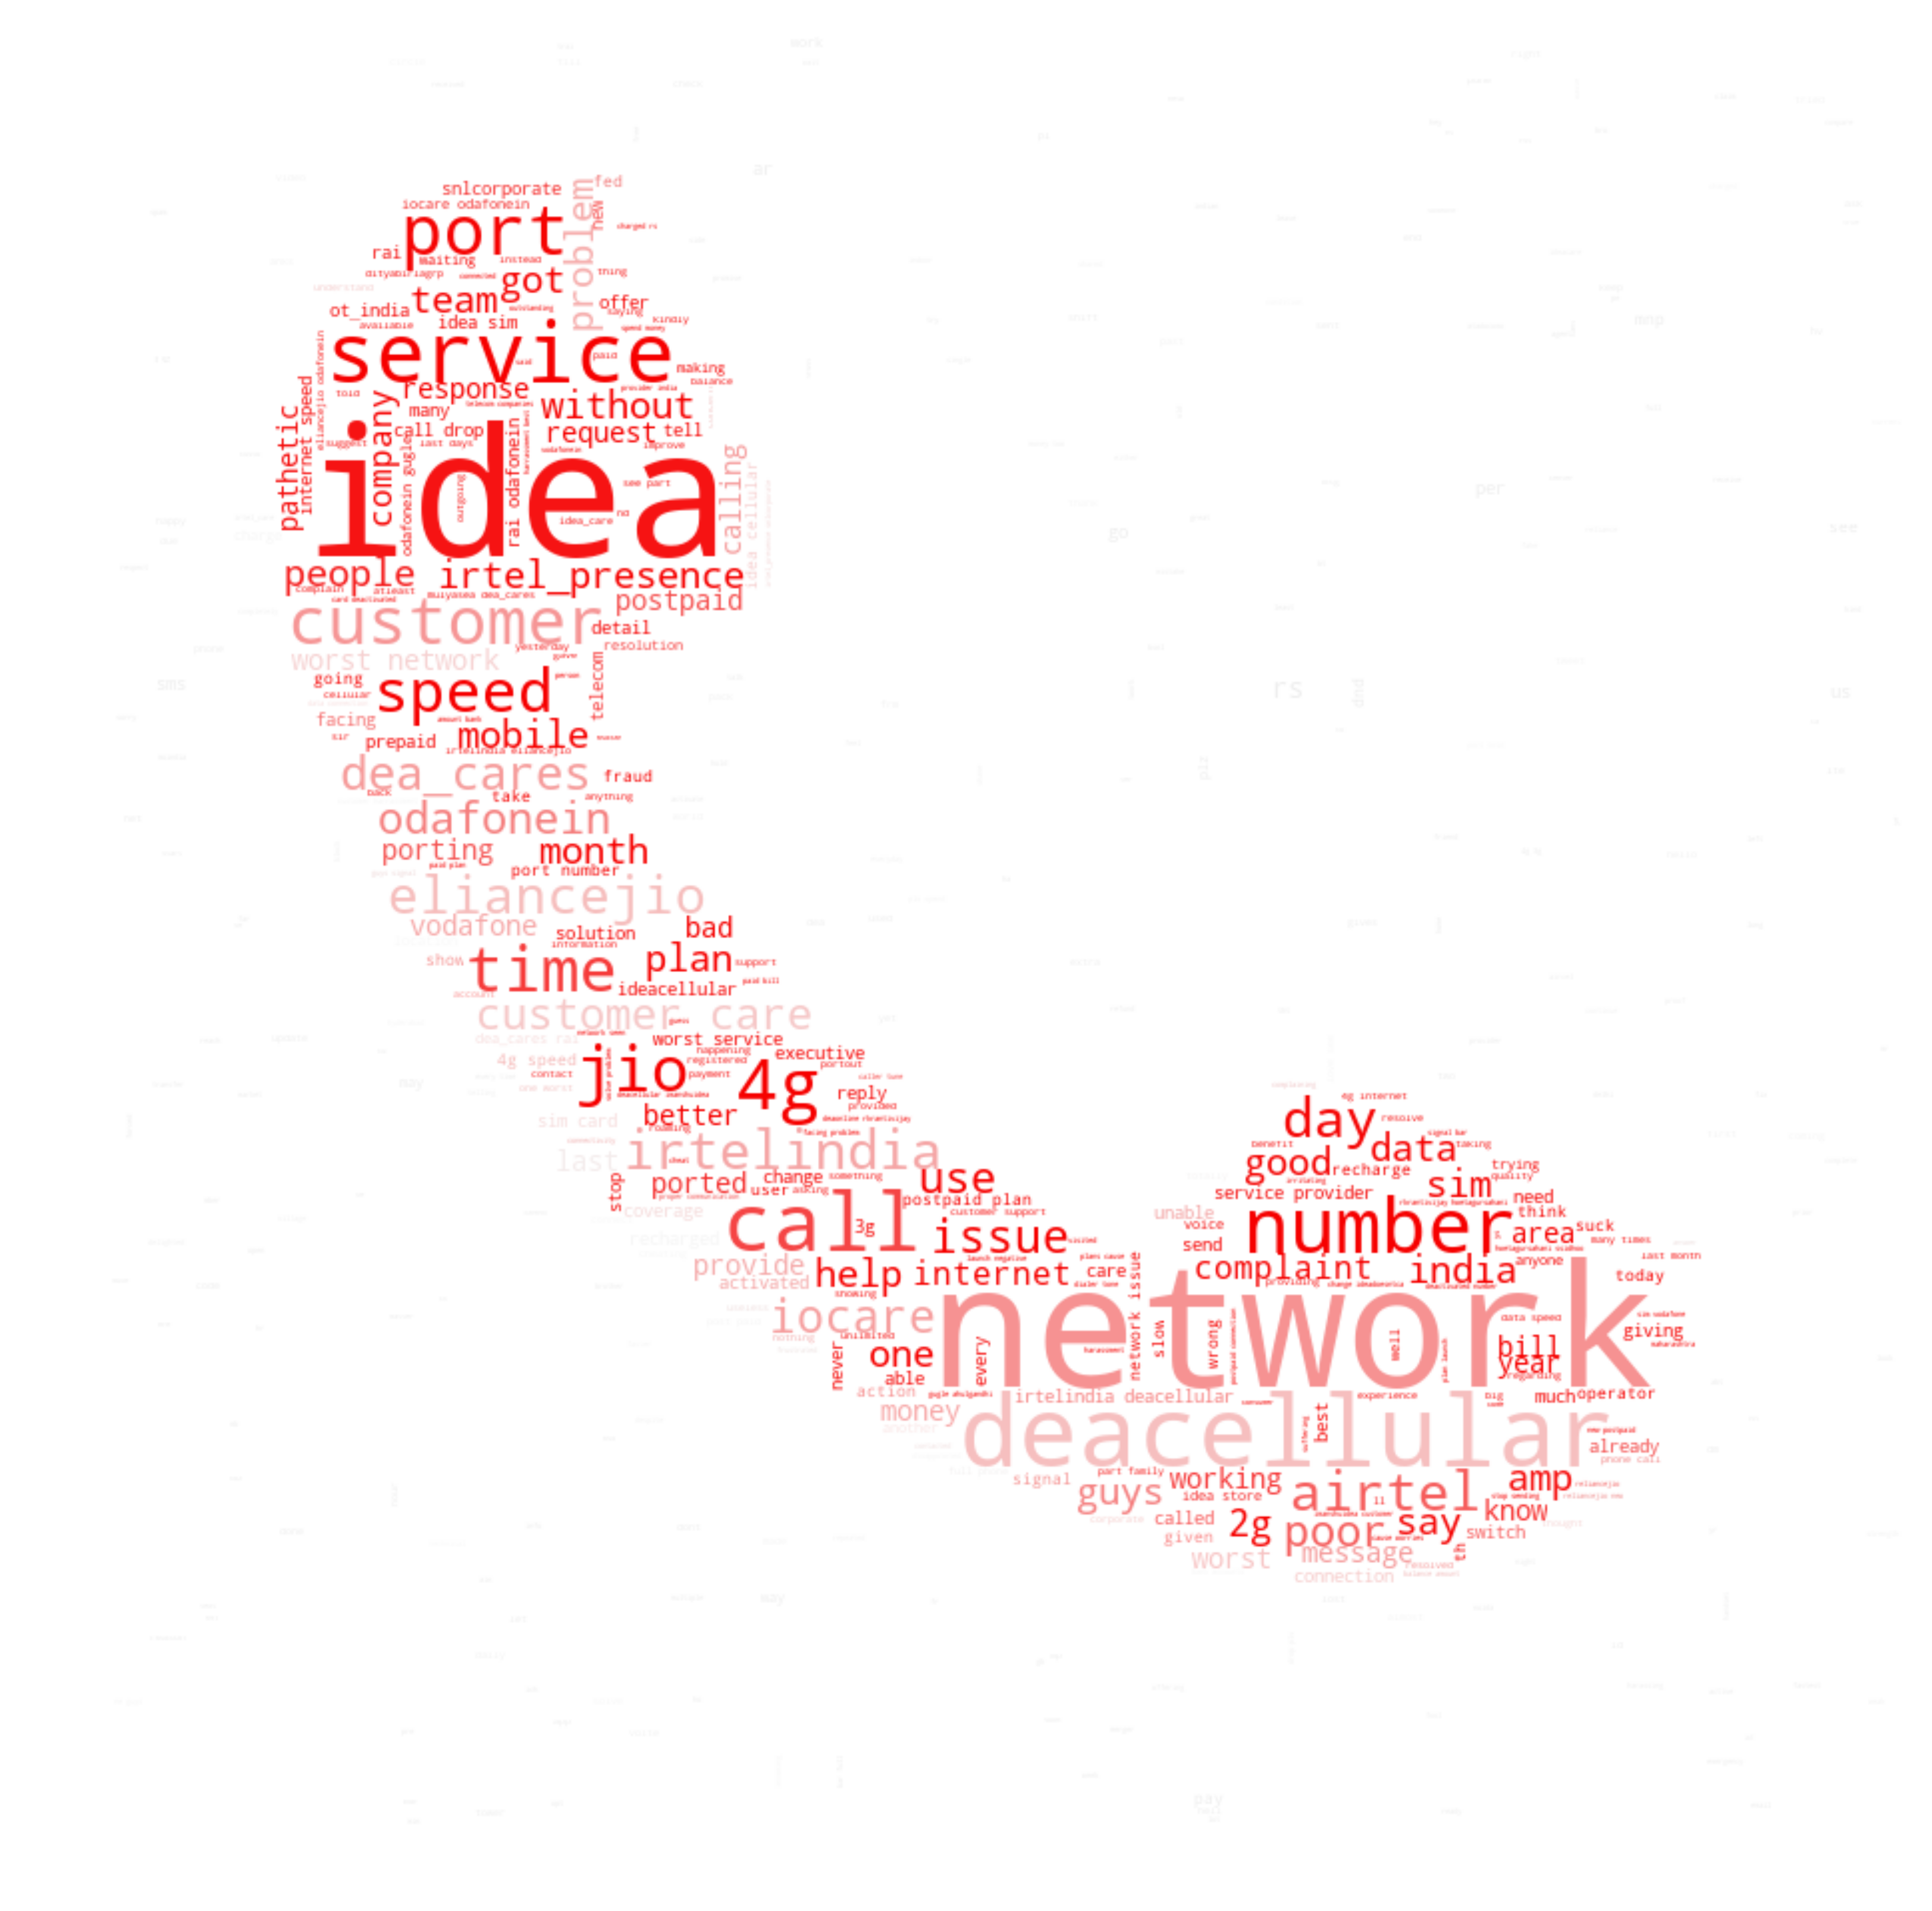

In [46]:
d = getcwd()
## join all documents in corpus
text= ''.join(str2)
stp=list(set(STOPWORDS))
w=['hi','ur','dear','rt','even','really','still','...','now','please','getting','guy','want','day','will','using','make','give']
q=w+stp

## image from PublicDomainPictures.net
## http://www.publicdomainpictures.net/view-image.php?image=232185&picture=family-gathering
mask = np.array(Image.open(path.join(d, "test6.jpg")))
wc = WordCloud(background_color="white", max_words=500, mask=mask,stopwords=q,
               max_font_size=90, random_state=42)
wc.generate(text)
# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,10],dpi=400)
plt.tight_layout(pad=0)
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

_=plt.show()